<a href="https://colab.research.google.com/github/vignesh200245/Guvi-Final-project-/blob/main/Final_project_E_commerce_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project On E -Commerce Customer Segmentation

The dataset contains details regarding the Invoice number,Stock code,description,Qunatity,Invoice date,Unit Price,CustomerID & Country

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings

# Load and read the dataset

In [ ]:
df=pd.read_csv("/content/data.csv",encoding="ISO-8859-1")
df.shape

(541909, 8)

In [ ]:
df.head()         # displays five rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.dtypes                                                                     # data type

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#df['InvoiceNo']=df['InvoiceNo'].astype(int)
#df["CustomerID"]=df["CustomerID"].astype(int)
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
df.isnull().sum()                                                    # check for null values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

With the enormous data available, it is impossible to impute values for the customerID. So deleting the missing values in customerID from the dataframe.

In [ ]:
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)                              #dropping the missing values/rows from the CustomerID
df.shape

(406829, 8)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#Checking for duplicate entries and deleting them .

In [ ]:
df['Country'].duplicated().value_counts()

True     406792
False        37
Name: Country, dtype: int64

In [ ]:
df['InvoiceNo'].duplicated().value_counts()

True     384639
False     22190
Name: InvoiceNo, dtype: int64

In [ ]:
df.duplicated().sum()


5225

In [ ]:
df.drop_duplicates(inplace = True)
df.shape

(401604, 8)

# Doing NLP in the description colum
-removing spaces & number
-converting to small letters

In [ ]:
df["Description"]

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 401604, dtype: object

In [ ]:
df["Desc_new"]=df["Description"].str.replace("[^a-zA-Z]","  ")
df["Desc_new"]=df["Desc_new"].astype(str)
df["Desc_new"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0          WHITE  HANGING  HEART  T  LIGHT  HOLDER
1                            WHITE  METAL  LANTERN
2               CREAM  CUPID  HEARTS  COAT  HANGER
3         KNITTED  UNION  FLAG  HOT  WATER  BOTTLE
4              RED  WOOLLY  HOTTIE  WHITE  HEART  
                            ...                   
541904           PACK  OF        SPACEBOY  NAPKINS
541905           CHILDREN  S  APRON  DOLLY  GIRL  
541906           CHILDRENS  CUTLERY  DOLLY  GIRL  
541907          CHILDRENS  CUTLERY  CIRCUS  PARADE
541908         BAKING  SET      PIECE  RETROSPOT  
Name: Desc_new, Length: 401604, dtype: object

In [ ]:
df["Desc_new"]=df["Desc_new"].apply(lambda row:" ".join([word for word in row.split() if len(word)>2]))
df["Desc_new"]

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
541904                  PACK SPACEBOY NAPKINS
541905              CHILDREN APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908             BAKING SET PIECE RETROSPOT
Name: Desc_new, Length: 401604, dtype: object

In [ ]:
df["Desc_new"]=[review.lower() for review in df["Desc_new"]]
df["Desc_new"]


0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905              children apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: Desc_new, Length: 401604, dtype: object

#Removing Stop words ,lemmatising

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stopwrds =stopwords.words('english')

#Making cutom list of stop words to be removed
addwrds=[]

#Adding to thelist of words
stopwrds.extend(addwrds)

#Function to remove stop words
def remove_stopwrds(rev):
  review_tokenized=word_tokenize(rev)
  rev_new=" ".join([i for i in review_tokenized if i not in stopwrds])
  return rev_new


#Removing Stop words
df['Desc_new']=[remove_stopwrds(r) for r in df['Desc_new']]




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Begin Lemmatisation
nltk.download("wordnet")
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

#function to convert nltk tag to wordnet tag
lemmatizer=WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startwith('J'):
    return wordnet.ADJ
  elif nltk_tag.startwith('V'):
    return wordnet.VERB
  elif nltk_tag.startwith('N'):
    return wordnet.NOUN
  elif nltk_tag.startwith('R'):
    return wordnet.ADJ
  else:
    return None


def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_-word_tokenize(sentence))
  wordnet_tagged=map(lambda x:(x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)

  lemmatized_sentence = []
  for word,tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
     lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return " ".join(lemmatized_sentence)


  df["Desc_new"]=df['Desc_new'].apply(lambda x:lemmatize_sentence(x))



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Desc_new
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hanging heart light holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,pack spaceboy napkins
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,children apron dolly girl
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery dolly girl
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery circus parade


In [ ]:
#Removing duplicated descriptions
df2=df["Desc_new"].drop_duplicates()
df2=pd.DataFrame(df2)
df2

,Desc_new
0,white hanging heart light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart
...,...
503602,set ribbons perfectly pretty
504104,set ribbons party
530382,pink crystal skull phone charm
537621,cream hanging heart light holder


In [ ]:
#Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer # give you the bag of words model
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer(binary = False)

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df2["Desc_new"]) # fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
df3=pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#shows the words in description colum
df3

,abc,abstract,acapulco,account,acrylic,address,ade,adult,advent,afghan,...,woven,wrap,wrapping,wreath,wrecking,writing,xmas,yellow,yuletide,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=bag_of_words.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#Using K-means clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("fivethirtyeight")

from warnings import filterwarnings
filterwarnings("ignore")

To find the optimal value of K we are use Elbow plot ,where k is the hyperparameter.


In [ ]:
list_k=list(range(1,25))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

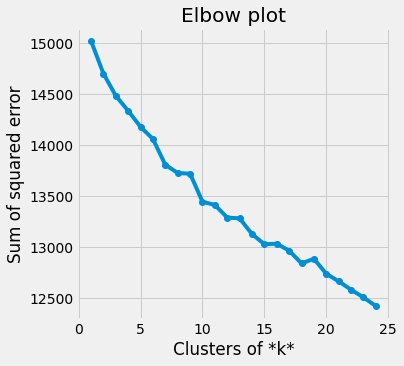

In [ ]:
# Make elbow plot
plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')


Here we used Kmeans to find the optimal vlaue of K Since there is no optimal value that can be infered here with the elbow plot we will do PCA.(Principal Component Analysis)

In [ ]:
sc=StandardScaler()                                                                 #performing standarisation
X_scaled= sc.fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
components= None
pca=PCA(n_components = components)                                        #components is the number of reduced relevant columns (hyperparameter)
pca.fit(x)

PCA()

In [ ]:
#prints the  variance
print("Variances(Percentage)")
print(pca.explained_variance_ratio_*100)


Variances(Percentage)
[2.22300320e+00 1.90830167e+00 1.71418905e+00 ... 2.29497262e-33
 8.37716432e-34 5.52131842e-34]


In [ ]:

print ("cumulative variance (Percentage)")
print((pca.explained_variance_ratio_.cumsum() * 100)[:100])



cumulative variance (Percentage)
[ 2.2230032   4.13130486  5.84549392  7.38908169  8.79359494 10.15342867
 11.43343815 12.56345241 13.64043534 14.67505428 15.67245348 16.6076564
 17.49921391 18.36730051 19.19339783 19.99472117 20.78778898 21.55317787
 22.31200883 23.04839284 23.76833351 24.47259033 25.14783334 25.80563987
 26.45723689 27.0968698  27.71107966 28.31391263 28.89358643 29.45831245
 30.01956097 30.55873184 31.09043653 31.60717367 32.11621274 32.61889156
 33.11117359 33.5998753  34.07451185 34.54151698 35.00097198 35.4559303
 35.90414657 36.34741404 36.77909866 37.20348523 37.62046317 38.02760859
 38.4306149  38.82144472 39.19604174 39.56234667 39.91825049 40.26658845
 40.61309412 40.95325261 41.2909637  41.62551888 41.9535601  42.27655792
 42.59742792 42.9124644  43.22568257 43.53512985 43.8366179  44.13366669
 44.42858818 44.7163791  45.0008463  45.28380351 45.56622688 45.84589431
 46.12156079 46.39609338 46.66797477 46.93414776 47.19515564 47.45548516
 47.71428263 47.9708

Text(0, 0.5, 'Explained variance(%)')

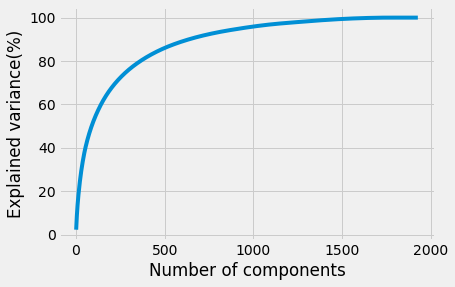

In [ ]:
#plot the cumulative varience
components=len(pca.explained_variance_ratio_)\
  if components  is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_*100))

plt.xlabel("Number of components")
plt.ylabel("Explained variance(%)")


Number of components: 638


Text(0, 0.5, 'Explained variance (%)')

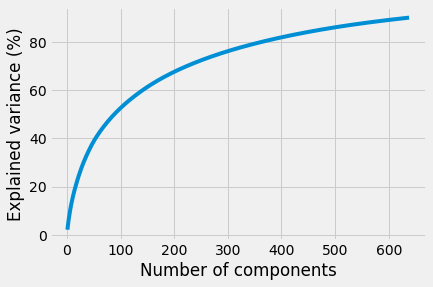

In [ ]:
#From the above graph we can see that it takes 1500 components to reach flat curve(100% varience).
# choosing around  90% of variations:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.90)
pca.fit(x)

# optimum no:of components
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Applying PCA:
PCA  helps in  lower dimension of data,while keeping all original variables in the model.

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(638)
Principal_Component_Analysis=pca.fit_transform(x)
Principal_Component_Analysis.shape

(3763, 638)

In [ ]:
#Elbow plot
#We make a plot btwn K value and inertia

list_k=list(range(1,20))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

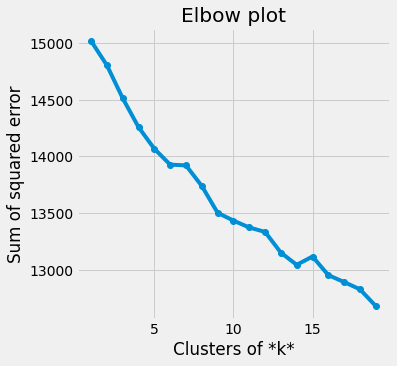

In [ ]:
# Make elbow plot
plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')

In [ ]:
#km modelling
km=KMeans(n_clusters=12)         #applying k
km.fit(Principal_Component_Analysis )   #fit the data

centroids = km.cluster_centers_

In [ ]:
#shows which group each datapoint belongs to
km.labels_

array([10,  2,  5, ...,  8, 10,  5], dtype=int32)

In [ ]:
#Predicts the labels of cluster
label=km.fit_predict(Principal_Component_Analysis)
print(label)

[ 6  9  9 ... 10  6  9]


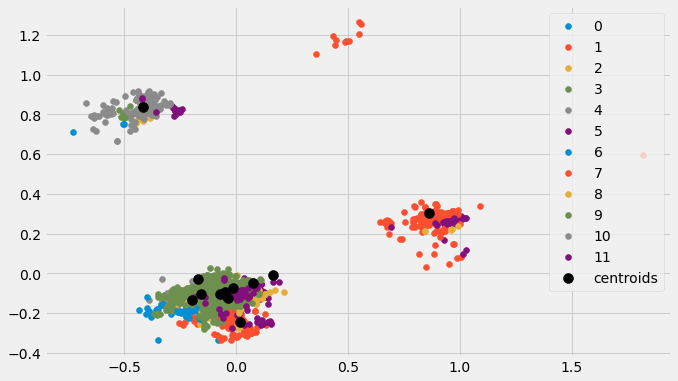

In [ ]:
#Getting the centroids
centroids=km.cluster_centers_
llabels=np.unique(label)

#plotting

plt.figure(figsize=(10,6))
for i in llabels:
  plt.scatter(Principal_Component_Analysis[label == i,0],Principal_Component_Analysis[label == i,1],label =i)
plt.scatter(centroids[:,0],centroids[:,1],s=100,c="k",label="centroids")
plt.legend()
plt.show()

#Concatenating the label,NLP description  into original dataframe

In [ ]:
df5=pd.DataFrame(km.labels_)
print(df5.shape)
df5

(3763, 1)


,0
0,6
1,9
2,9
3,9
4,1
...,...
3758,7
3759,7
3760,10
3761,6


In [ ]:
df2=df2.reset_index(drop=True)
df2

,Desc_new
0,white hanging heart light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart
...,...
3758,set ribbons perfectly pretty
3759,set ribbons party
3760,pink crystal skull phone charm
3761,cream hanging heart light holder


In [ ]:
df6=df2.join(df5)
df6.rename(columns={0:'Product Code'},inplace=True)
df6.head(3)

,Desc_new,Product Code
0,white hanging heart light holder,6
1,white metal lantern,9
2,cream cupid hearts coat hanger,9


In [ ]:
df8=pd.merge(df,df6,how="left",on="Desc_new")
df8

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Desc_new,Product Code
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hanging heart light holder,6
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern,9
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,9
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,9
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart,1
...,...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,pack spaceboy napkins,9
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,children apron dolly girl,9
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery dolly girl,9
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery circus parade,9


In [ ]:
df9 = pd.get_dummies(df8,columns=["Product Code"])     ##product code one hot encoding
df9.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Desc_new,Product Code_0,...,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hanging heart light holder,0,...,0,0,0,0,1,0,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern,0,...,0,0,0,0,0,0,0,1,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,0,...,0,0,0,0,0,0,0,1,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,0,...,0,0,0,0,0,0,0,1,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df10 = df9.copy()      #copying df9

In [ ]:
df10 = df10.drop(["InvoiceNo","StockCode","Description","InvoiceDate","Country","Desc_new"],axis=1)
df10.head()

,Quantity,UnitPrice,CustomerID,Product Code_0,Product Code_1,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
0,6,2.55,17850.0,0,0,0,0,0,0,1,0,0,0,0,0
1,6,3.39,17850.0,0,0,0,0,0,0,0,0,0,1,0,0
2,8,2.75,17850.0,0,0,0,0,0,0,0,0,0,1,0,0
3,6,3.39,17850.0,0,0,0,0,0,0,0,0,0,1,0,0
4,6,3.39,17850.0,0,1,0,0,0,0,0,0,0,0,0,0


Grouping the Customers based on CustomerID:

In [ ]:
df11 = df10.groupby(['CustomerID']).mean()
df11

,Quantity,UnitPrice,Product Code_0,Product Code_1,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
CustomerID,,,,,,,,,,,,,,
12346.0,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
12347.0,13.505495,2.644011,0.016484,0.109890,0.038462,0.000000,0.005495,0.142857,0.032967,0.032967,0.010989,0.532967,0.071429,0.005495
12348.0,75.516129,5.764839,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.096774,0.064516,0.677419,0.064516,0.064516
12349.0,8.643836,8.289041,0.000000,0.136986,0.000000,0.013699,0.000000,0.082192,0.027397,0.178082,0.013699,0.438356,0.027397,0.082192
12350.0,11.588235,3.841176,0.000000,0.117647,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.764706,0.058824,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,4.500000,4.765000,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.000000,0.700000,0.000000,0.000000
18281.0,7.714286,5.622857,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.285714,0.000000,0.000000
18282.0,7.538462,4.821538,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,0.076923,0.615385,0.076923,0.000000


In [ ]:
df11.describe()

,Quantity,UnitPrice,Product Code_0,Product Code_1,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,22.403123,7.982549,0.020089,0.060562,0.012775,0.023517,0.026877,0.047459,0.039941,0.093266,0.050888,0.534442,0.041506,0.048680
std,213.256361,144.965562,0.046354,0.079343,0.031056,0.073081,0.056108,0.072656,0.078862,0.092703,0.091713,0.176299,0.058194,0.063357
min,-144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.491504,2.225481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.444444,0.000000,0.000000
50%,9.500000,2.947169,0.000000,0.043478,0.000000,0.000000,0.000000,0.031250,0.015385,0.079042,0.011494,0.529412,0.027397,0.034483
75%,14.033772,3.898948,0.020470,0.085714,0.014044,0.018898,0.033333,0.067582,0.051546,0.133333,0.067096,0.619048,0.060606,0.073349
max,12540.000000,8055.780000,0.705882,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Converting into numpy array:
y = df11.to_numpy()
y

array([[0.00000000e+00, 1.04000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.35054945e+01, 2.64401099e+00, 1.64835165e-02, ...,
        5.32967033e-01, 7.14285714e-02, 5.49450549e-03],
       [7.55161290e+01, 5.76483871e+00, 0.00000000e+00, ...,
        6.77419355e-01, 6.45161290e-02, 6.45161290e-02],
       ...,
       [7.53846154e+00, 4.82153846e+00, 0.00000000e+00, ...,
        6.15384615e-01, 7.69230769e-02, 0.00000000e+00],
       [1.88210818e+00, 1.62875173e+00, 6.93481276e-03, ...,
        4.67406380e-01, 5.96393897e-02, 1.52565881e-01],
       [2.26571429e+01, 1.49357143e+00, 0.00000000e+00, ...,
        4.42857143e-01, 7.14285714e-02, 4.28571429e-02]])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
y_scaled = sc.fit_transform(y)

In [ ]:
list_k=list(range(1,15))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(y_scaled)
    inertias.append(km.inertia_)


Text(0, 0.5, 'Sum of squared error')

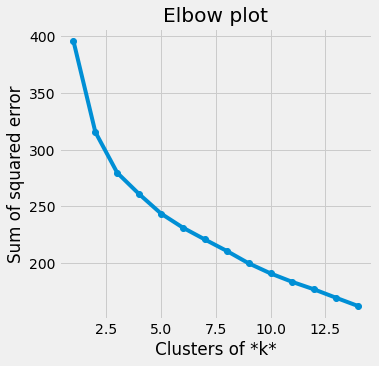

In [ ]:
plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')

From Elbow plot we can say that the optimal  K value is at 4,thus the customers can be clusterd into 4 clusters based on their similarities

In [ ]:
km = KMeans(n_clusters=4)     # applying k = 4
km.fit(y_scaled)          # fit the data

centroids = km.cluster_centers_   # final centroid points

# print("centroids: ",centroids)
print("inertia: ",km.inertia_)

inertia:  260.7072952622847


In [ ]:
km.labels_

array([3, 0, 0, ..., 0, 1, 1], dtype=int32)

In [ ]:
label = km.fit_predict(y_scaled)
print(label)

[1 2 2 ... 2 3 3]


Visualizing the customer clusters:

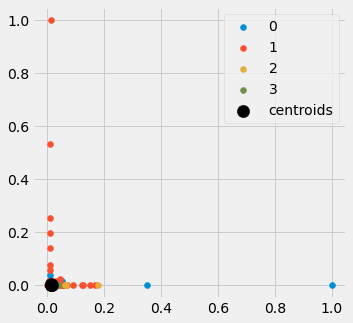

In [ ]:
# Getting the Centroids and Cluster labels
centroids = km.cluster_centers_
labels = np.unique(label)

#  plotting
plt.figure(figsize=(5, 5))
for i in labels:
    plt.scatter(y_scaled[label == i , 0] , y_scaled[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] ,  c="k", s=150, label="centroids")
plt.legend()
plt.show()

Since the graph doesnt give a clear picture of the clusters formed ,we are converting the label to dataframe and assigne the respective labels to their clusters and plot them.

In [ ]:
df13 = pd.DataFrame(label)
df13.head()

,0
0,1
1,2
2,2
3,3
4,1


In [ ]:
df13.reset_index(level=0, inplace=True)#reseting  the index
df13.head()

,index,0
0,0,1
1,1,2
2,2,2
3,3,3
4,4,1


In [ ]:
df13.rename(columns={'index':'ID', 0:'Customer cluster'},inplace=True)
df13.head()

,ID,Customer cluster
0,0,1
1,1,2
2,2,2
3,3,3
4,4,1


In [ ]:
df14 = df13.groupby("Customer cluster").count()           #grouping the df based n the custmoer cluster and counting  customers belonging to each cluster
df14

,ID
Customer cluster,
0,283
1,552
2,2187
3,1350


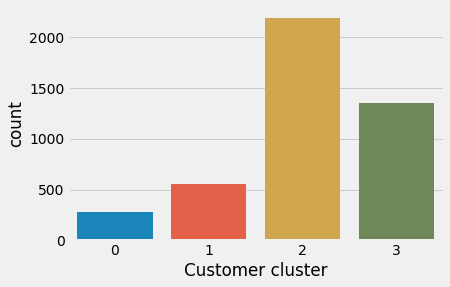

In [ ]:
import seaborn as sns
sns.countplot(df13["Customer cluster"])

From the  above graph Customer Cluster 2 is having the maximum number of Cutomers and cluster 0 has the minimum number of customers